<a href="https://colab.research.google.com/github/550tealeaves/DATA71200_sum2024_550/blob/main/data71200class3lab_WorkingCopy_edited_binning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix

# In-Class Activity 1

In [3]:
# Import the California Housing Data from used in the HOML book, Chapter 2
# Apply one-hot encoding to the ocean_proximity value

import os
import tarfile
from six.moves import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    os.makedirs(housing_path, exist_ok=True)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [4]:
fetch_housing_data()

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [5]:
housing = load_housing_data()

In [6]:
#print the housing.head (data.head) so that you can see feature names
print(housing.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


In [7]:
from sklearn.preprocessing import OrdinalEncoder # just to raise an ImportError if Scikit-Learn < 0.20
from sklearn.preprocessing import OneHotEncoder

#housing_cat is the dataframe
housing_cat = housing['ocean_proximity'].values.reshape(-1,1)


display(housing_cat)

#Had to add this from the class 3 code book
ohe = OneHotEncoder(sparse=False)


ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
print('housing_cat_encoded')
display(housing_cat_encoded)


array([['NEAR BAY'],
       ['NEAR BAY'],
       ['NEAR BAY'],
       ...,
       ['INLAND'],
       ['INLAND'],
       ['INLAND']], dtype=object)

housing_cat_encoded


array([[3.],
       [3.],
       [3.],
       ...,
       [1.],
       [1.],
       [1.]])

# In-Class Activity 2

In [19]:
# Apply binning to the housing_median_age value in the California Housing dataset that we looked at last class
# Plot both the original data and the binned data using matplotlib

from sklearn.preprocessing import KBinsDiscretizer
kb = KBinsDiscretizer(n_bins=10, strategy='uniform')


In [20]:
housing_pd = housing.transpose()
housing_pd.head()

,0,1,2,3,4,5,6,7,8,9,...,20630,20631,20632,20633,20634,20635,20636,20637,20638,20639
longitude,-122.23,-122.22,-122.24,-122.25,-122.25,-122.25,-122.25,-122.25,-122.26,-122.25,...,-121.32,-121.4,-121.45,-121.53,-121.56,-121.09,-121.21,-121.22,-121.32,-121.24
latitude,37.88,37.86,37.85,37.85,37.85,37.85,37.84,37.84,37.84,37.84,...,39.29,39.33,39.26,39.19,39.27,39.48,39.49,39.43,39.43,39.37
housing_median_age,41.0,21.0,52.0,52.0,52.0,52.0,52.0,52.0,42.0,52.0,...,11.0,15.0,15.0,27.0,28.0,25.0,18.0,17.0,18.0,16.0
total_rooms,880.0,7099.0,1467.0,1274.0,1627.0,919.0,2535.0,3104.0,2555.0,3549.0,...,2640.0,2655.0,2319.0,2080.0,2332.0,1665.0,697.0,2254.0,1860.0,2785.0
total_bedrooms,129.0,1106.0,190.0,235.0,280.0,213.0,489.0,687.0,665.0,707.0,...,505.0,493.0,416.0,412.0,395.0,374.0,150.0,485.0,409.0,616.0


In [22]:
kb.fit(housing['housing_median_age'].values.reshape(-1, 1))

KBinsDiscretizer(n_bins=10, strategy='uniform')

In [23]:
print("bin edges: \n", kb.bin_edges_)

bin edges: 
 [array([ 1. ,  6.1, 11.2, 16.3, 21.4, 26.5, 31.6, 36.7, 41.8, 46.9, 52. ])]


In [24]:
import matplotlib.pyplot as plt

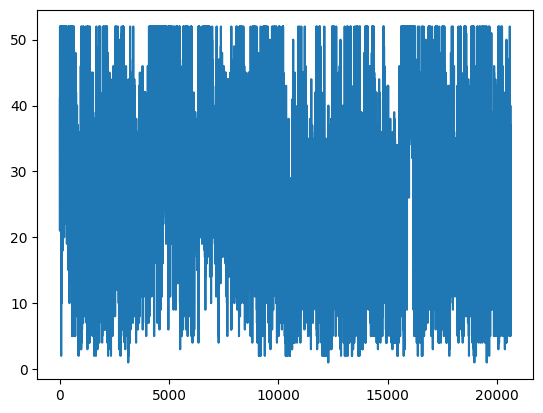

In [25]:
plt.plot(housing['housing_median_age'].values.reshape(-1, 1))

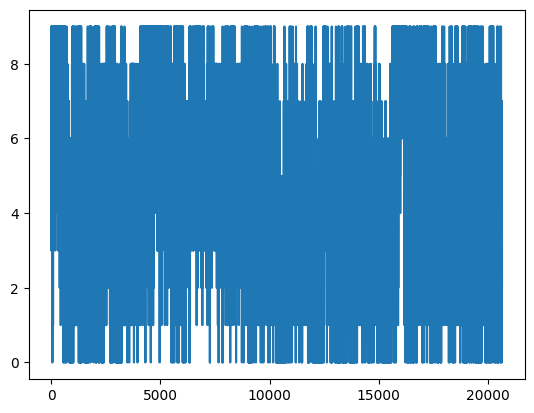

In [26]:
binned = kb.transform(housing['housing_median_age'].values.reshape(-1, 1))
plt.plot(binned.argmax(1))

# In-Class Activity 3

In [ ]:
#Apply the following transformations to housing_median_age and median_income in the California Housing dataset
# Squaring (**2)
# Cubing (**3)
# np.log
# np.exp
# Plot histograms and scatter matrices to explore the resultant data

# housing_median_age


In [ ]:
# median_income


In [ ]:
#scatter matrix for the original data for house_median_age and median_income



In [ ]:
#scatter matrix for the squared data for house_median_age and median_income


In [ ]:
#scatter matrix for the cubed data for house_median_age and median_income
